## Introduction to Pandas

In this tutorial we download real data from NYC open data through API and analyse the data in Pandas. We cover the basic Pandas functions, visualize data and make small assignment in pairs.

Before we start import necessary packages

In [2]:
import pandas as pd

Pandas introduces two new data structures to Python - Series and DataFrame.

#### Series
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

#### DataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

For the rest of the tutorial, we'll be primarily working with DataFrames.

Create series data

In [3]:
column = pd.Series([ 'Urban centre', 'Population centre', 'Urban area', 'Market Area'])

In [4]:
column

0         Urban centre
1    Population centre
2           Urban area
3          Market Area
dtype: object

If an index is not specified, a default sequence of integers is assigned as the index. 

In [5]:
column.values

array(['Urban centre', 'Population centre', 'Urban area', 'Market Area'], dtype=object)

In [6]:
column.index

RangeIndex(start=0, stop=4, step=1)

We can use positional indexing to get the value.

In [7]:
column[0]

'Urban centre'

Using pandas we will explore the dataset from NYC Open data about Service Requests. This dataset is quite big since the information about complaints has stored since 2010. Data can be dowloaded from [NYC open data](https://data.cityofnewyork.us/Social-Services/311/wpe2-h2i5). For our analysis we will consider small already prepared subset of this data starting from 2015 year.

Begin with reading the data

In [8]:
complaints = pd.read_csv('nyc_complaints_data_inclass.csv')

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

We can print only first 5 rows of DataFrame using function head()

In [9]:
complaints.head()

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,-73.846760,1.439978e+09,12,8,2
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,-74.173832,1.439286e+09,12,8,1


**created_date** - Date SR was created

**closed_date** - Date SR was closed by responding agency

**agency_name** - Agency name resposible for SR submission

**resolution_action_updated_date** - Date when responding agency last updated the SR

**complaint_type** - Complaint Type may have a corresponding Descriptor (below) or may stand alone.

**status** - Status of SR submitted 

**latitude** - Geo based Lat of the incident location

**longitude** - Geo based Lon of the incident location

**borough** - NYC borough of the incident

**street_name** - Street name of incident address provided by the submitter

Or the last 5 rows:

In [10]:
complaints.tail()

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
18536,299179,08/26/2015 07:13:00 PM,08/29/2015 01:15:00 AM,Department of Transportation,Street Light Condition,Closed,NaN,NaN,MANHATTAN,NaN,NaN,1.440562e+09,7,8,2
18537,1312031,08/30/2015 03:10:04 PM,09/08/2015 09:56:57 AM,Department of Parks and Recreation,Maintenance or Facility,Closed,NaN,Park,BROOKLYN,NaN,NaN,1.440893e+09,3,8,6
18538,1310024,08/31/2015 04:24:56 PM,09/01/2015 05:56:42 AM,New York City Police Department,Derelict Vehicle,Closed,MONTICELLO TERRACE,Street/Sidewalk,STATEN ISLAND,40.545188,-74.147918,1.440984e+09,4,8,0
18539,1803391,08/14/2015 02:37:41 AM,08/14/2015 07:38:39 AM,New York City Police Department,Illegal Parking,Closed,HENRY STREET,Street/Sidewalk,BROOKLYN,40.677185,-74.002762,1.439509e+09,2,8,4
18540,1260678,08/18/2015 08:10:29 PM,08/18/2015 08:41:58 PM,New York City Police Department,Illegal Parking,Closed,WEST 162 STREET,Street/Sidewalk,MANHATTAN,40.838118,-73.944837,1.439875e+09,8,8,1


Print DataFrame shape - number of rows and columns

In [11]:
complaints.shape

(18541, 15)

Print all DataFrame columns

In [12]:
complaints.columns

Index(['Unnamed: 0', 'Created Date', 'Closed Date', 'Agency Name',
       'Complaint Type', 'Status', 'Street Name', 'Location Type', 'Borough',
       'Latitude', 'Longitude', 'created_timestamp', 'created_hour',
       'created_month', 'created_day'],
      dtype='object')

Print columns types

In [13]:
complaints.dtypes

Unnamed: 0             int64
Created Date          object
Closed Date           object
Agency Name           object
Complaint Type        object
Status                object
Street Name           object
Location Type         object
Borough               object
Latitude             float64
Longitude            float64
created_timestamp    float64
created_hour           int64
created_month          int64
created_day            int64
dtype: object

To print the statistics over DataFrame

In [14]:
complaints.describe()

,Unnamed: 0,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
count,1.854100e+04,16802.000000,16802.000000,1.854100e+04,18541.000000,18541.0,18541.000000
mean,1.332339e+06,40.729831,-73.922109,1.439698e+09,7.157381,8.0,2.790464
std,5.890400e+05,0.084932,0.082610,7.689999e+05,3.649879,0.0,2.025657
min,8.000000e+00,40.500259,-74.250559,1.438380e+09,1.000000,8.0,0.000000
25%,1.016328e+06,40.669031,-73.965085,1.439015e+09,4.000000,8.0,1.000000
50%,1.283197e+06,40.720275,-73.927098,1.439704e+09,8.000000,8.0,3.000000
75%,1.808900e+06,40.804905,-73.874262,1.440385e+09,10.000000,8.0,5.000000
max,2.194571e+06,40.912869,-73.703296,1.441015e+09,12.000000,8.0,6.000000


We can print only one Series of DataFrame 

In [15]:
complaints['Complaint Type']

0        Root/Sewer/Sidewalk Condition
1        Root/Sewer/Sidewalk Condition
2                     Dirty Conditions
3        General Construction/Plumbing
4                     Derelict Vehicle
5              Noise - Street/Sidewalk
6                     Dirty Conditions
7                      FLOORING/STAIRS
8                 Sanitation Condition
9              Maintenance or Facility
10                   Broken Muni Meter
11                       PAINT/PLASTER
12            Benefit Card Replacement
13                            ELECTRIC
14                      HEAT/HOT WATER
15                       Agency Issues
16                UNSANITARY CONDITION
17                 Noise - Residential
18                            ELECTRIC
19                     Illegal Parking
20                        Water System
21                 Noise - Residential
22                               Noise
23             Litter Basket / Request
24                    Street Condition
25                       

The second way to print the one column

In [16]:
complaints.Status

0              Open
1              Open
2            Closed
3            Closed
4            Closed
5            Closed
6            Closed
7            Closed
8            Closed
9            Closed
10           Closed
11           Closed
12           Closed
13           Closed
14           Closed
15       Email Sent
16           Closed
17           Closed
18           Closed
19           Closed
20             Open
21           Closed
22           Closed
23             Open
24           Closed
25           Closed
26             Open
27           Closed
28           Closed
29           Closed
            ...    
18511        Closed
18512        Closed
18513        Closed
18514        Closed
18515       Pending
18516        Closed
18517        Closed
18518        Closed
18519       Pending
18520        Closed
18521        Closed
18522        Closed
18523        Closed
18524        Closed
18525        Closed
18526       Pending
18527        Closed
18528        Closed
18529        Closed


### Basics of indexing in Pandas

The first use of indexing is to use a slice, just like we have done with other Python objects. Below we slice the first 5 index values of the first dimension of the dataframe.

In [17]:
complaints[:5]

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,-73.846760,1.439978e+09,12,8,2
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,-74.173832,1.439286e+09,12,8,1


The first indexing method is equivalent to using the iloc indexing method, which uses the integer based indexing, purely based on the location of the index.

In [18]:
complaints.iloc[:5]

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,-73.846760,1.439978e+09,12,8,2
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,-74.173832,1.439286e+09,12,8,1


In [ ]:
complaints.iloc[:5, :5]

The other way to print the slice is to use the loc method. loc method is the same as iloc, but when we need to print subset of columns istead index column you pass its name

In [42]:
complaints.loc[:5]

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,ELY AVENUE,Street,BRONX,40.893565,-73.846760,1.439978e+09,12,8,2
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department,Derelict Vehicle,Closed,MEMPHIS AVENUE,Street/Sidewalk,STATEN ISLAND,40.548168,-74.173832,1.439286e+09,12,8,1
5,1280044,08/28/2015 10:47:36 PM,08/29/2015 01:04:13 AM,New York City Police Department,Noise - Street/Sidewalk,Closed,NaN,Street/Sidewalk,QUEENS,40.686240,-73.839059,1.440748e+09,10,8,4


In [43]:
complaints.loc[:5, :'Agency Name']

,Unnamed: 0,Created Date,Closed Date,Agency Name
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation
1,1141518,08/19/2015 12:59:52 PM,NaN,Department of Parks and Recreation
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings
4,182630,08/11/2015 12:44:35 PM,08/11/2015 02:25:27 PM,New York City Police Department
5,1280044,08/28/2015 10:47:36 PM,08/29/2015 01:04:13 AM,New York City Police Department


Note that indexing can work for both rows and colums

We can select rows based on their value as well.  Notice that we nest df[df[condition]] to get this result.

In [22]:
complaints[complaints['created_hour'] < 12]

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
0,1235309,08/25/2015 10:35:59 AM,NaN,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Open,EAST 24 STREET,Street,BROOKLYN,40.615938,-73.950636,1.440488e+09,10,8,1
2,1504180,08/20/2015 02:34:00 PM,08/21/2015 12:00:00 PM,A - Brooklyn,Dirty Conditions,Closed,EAST 93 STREET,Sidewalk,BROOKLYN,40.640863,-73.902885,1.440027e+09,2,8,3
3,98387,08/25/2015 02:01:18 PM,02/11/2016 12:00:00 AM,Department of Buildings,General Construction/Plumbing,Closed,79 AVENUE,NaN,QUEENS,40.694845,-73.897502,1.440457e+09,2,8,1
5,1280044,08/28/2015 10:47:36 PM,08/29/2015 01:04:13 AM,New York City Police Department,Noise - Street/Sidewalk,Closed,NaN,Street/Sidewalk,QUEENS,40.686240,-73.839059,1.440748e+09,10,8,4
6,1808701,08/17/2015 09:08:00 PM,08/21/2015 12:00:00 PM,A - Queens,Dirty Conditions,Closed,104 STREET,Lot,QUEENS,40.759089,-73.864862,1.439792e+09,9,8,0
7,1157846,08/13/2015 04:08:06 PM,08/14/2015 07:58:21 PM,Department of Housing Preservation and Develop...,FLOORING/STAIRS,Closed,EAST 117 STREET,RESIDENTIAL BUILDING,MANHATTAN,40.796181,-73.933701,1.439428e+09,4,8,3
8,1827086,08/28/2015 04:07:00 PM,08/29/2015 12:00:00 PM,BCC - Bronx,Sanitation Condition,Closed,FURMAN AVENUE,Sidewalk,BRONX,40.896104,-73.854824,1.440724e+09,4,8,4
9,814112,08/09/2015 08:39:12 PM,08/21/2015 10:14:39 AM,Department of Parks and Recreation,Maintenance or Facility,Closed,NaN,Beach,QUEENS,NaN,NaN,1.439099e+09,8,8,6
10,1269494,08/18/2015 01:50:07 PM,08/19/2015 01:18:46 PM,Department of Transportation,Broken Muni Meter,Closed,NaN,Street,MANHATTAN,40.743390,-73.986146,1.439852e+09,1,8,1
11,1114868,08/02/2015 01:10:30 AM,08/12/2015 12:39:33 PM,Department of Housing Preservation and Develop...,PAINT/PLASTER,Closed,AVENUE H,RESIDENTIAL BUILDING,BROOKLYN,40.631844,-73.944413,1.438467e+09,1,8,6


In [23]:
complaints[complaints['Agency Name'] == 'Department of Finance']

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
69,818172,08/03/2015 04:45:58 PM,08/04/2015 07:41:01 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.438566e+09,4,8,0
82,814246,08/10/2015 01:21:38 PM,08/11/2015 07:09:27 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.439159e+09,1,8,0
161,808932,08/04/2015 12:24:09 PM,08/05/2015 12:26:30 PM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.438680e+09,12,8,1
266,808994,08/04/2015 03:26:11 PM,08/05/2015 03:30:12 PM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.438648e+09,3,8,1
375,1044915,08/06/2015 01:07:26 PM,08/07/2015 07:13:30 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.438812e+09,1,8,3
404,1090664,08/14/2015 09:54:58 AM,08/17/2015 07:16:13 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.439535e+09,9,8,4
430,806329,08/03/2015 10:00:46 AM,08/04/2015 10:03:33 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.438585e+09,10,8,0
543,931907,08/31/2015 04:42:47 PM,09/01/2015 07:12:20 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.440985e+09,4,8,0
615,1090214,08/15/2015 02:02:02 PM,08/17/2015 07:16:57 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.439593e+09,2,8,5
696,1226650,08/17/2015 11:44:05 AM,08/18/2015 07:15:53 AM,Department of Finance,DOF Literature Request,Closed,NaN,NaN,Unspecified,NaN,NaN,1.439801e+09,11,8,0


We can sort DataFrame by the chosen column

In [24]:
complaints.sort_values(by='created_hour', ascending=[1])

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
11979,1799149,08/11/2015 01:03:23 PM,08/22/2015 01:09:25 PM,Department of Housing Preservation and Develop...,ELECTRIC,Closed,1 AVENUE,RESIDENTIAL BUILDING,MANHATTAN,40.791649,-73.938570,1.439244e+09,1,8,1
17954,1319949,08/27/2015 01:33:40 PM,09/19/2015 05:07:32 PM,Department of Housing Preservation and Develop...,DOOR/WINDOW,Closed,BROADWAY,RESIDENTIAL BUILDING,MANHATTAN,40.836272,-73.943274,1.440628e+09,1,8,3
3725,146087,08/23/2015 01:49:48 PM,08/23/2015 08:47:26 PM,New York City Police Department,Noise - Commercial,Closed,FLATBUSH AVENUE,Store/Commercial,BROOKLYN,40.640042,-73.955194,1.440284e+09,1,8,6
7947,1103374,08/11/2015 01:09:26 PM,10/01/2015 01:06:53 AM,Department of Housing Preservation and Develop...,PAINT/PLASTER,Closed,STRATFORD AVENUE,RESIDENTIAL BUILDING,BRONX,40.830662,-73.875828,1.439245e+09,1,8,1
7948,131991,08/14/2015 01:36:58 PM,08/14/2015 03:18:42 PM,Department of Parks and Recreation,Maintenance or Facility,Closed,NaN,Park,BROOKLYN,NaN,NaN,1.439505e+09,1,8,4
14887,13710,08/16/2015 01:52:16 PM,08/16/2015 09:57:39 PM,New York City Police Department,Illegal Parking,Closed,LONG ISLAND EXPY E,Street/Sidewalk,QUEENS,40.738485,-73.848452,1.439679e+09,1,8,6
15399,1791861,08/07/2015 01:19:00 PM,09/07/2015 12:05:00 PM,Department of Environmental Protection,Water System,Closed,112 ST,NaN,QUEENS,40.678608,-73.827065,1.438900e+09,1,8,4
9532,110603,08/14/2015 01:14:44 PM,08/18/2015 12:04:49 PM,Department of Consumer Affairs,Consumer Complaint,Closed,EAST 18 STREET,NaN,MANHATTAN,40.736199,-73.986353,1.439504e+09,1,8,4
7957,1280265,08/29/2015 01:06:17 AM,08/29/2015 02:54:43 AM,New York City Police Department,Noise - Street/Sidewalk,Closed,STERLING STREET,Street/Sidewalk,BROOKLYN,40.663205,-73.949469,1.440800e+09,1,8,5
2641,1203602,08/11/2015 01:06:36 PM,08/17/2015 09:31:58 PM,Department of Housing Preservation and Develop...,DOOR/WINDOW,Closed,216 STREET,RESIDENTIAL BUILDING,QUEENS,40.712002,-73.742431,1.439244e+09,1,8,1


Here we show how to set a value of a cell in the table, identifying a specific row by index label, and setting its closed date, in this case to a None value, which Pandas interprets as a NaN (missing value).

In [ ]:
complaints.loc[688,'Closed Date'] = None

We can filter for values that are Null

In [ ]:
complaints[complaints['Closed Date'].isnull()]

Or more commonly, filter out the null values.

In [ ]:
complaints[complaints['Closed Date'].notnull()]

Here we find and print records that are related to Parking, using the str attribute and 'contains' to search for the county name in complaints type.

In [ ]:
complaints[complaints['Complaint Type'].str.contains('Parking')]

We can combine two conditions in order to select rows

In [44]:
complaints[(complaints['Complaint Type'].str.contains('Parking')) & (complaints['Closed Date'].notnull())]

,Unnamed: 0,Created Date,Closed Date,Agency Name,Complaint Type,Status,Street Name,Location Type,Borough,Latitude,Longitude,created_timestamp,created_hour,created_month,created_day
19,1200825,08/02/2015 09:13:47 PM,08/02/2015 09:39:17 PM,New York City Police Department,Illegal Parking,Closed,NaN,Street/Sidewalk,MANHATTAN,40.757257,-73.985822,1.438496e+09,9,8,6
77,1311409,08/31/2015 10:48:31 AM,09/01/2015 03:02:23 AM,New York City Police Department,Illegal Parking,Closed,EAST 96 STREET,Street/Sidewalk,MANHATTAN,40.784866,-73.948579,1.441007e+09,10,8,0
90,1268639,08/27/2015 11:04:50 AM,08/27/2015 01:19:06 PM,New York City Police Department,Illegal Parking,Closed,BEACH 101 STREET,Street/Sidewalk,QUEENS,40.585097,-73.822684,1.440663e+09,11,8,3
100,926316,08/12/2015 07:08:58 AM,08/12/2015 12:20:17 PM,New York City Police Department,Illegal Parking,Closed,NAUGHTON AVENUE,Street/Sidewalk,STATEN ISLAND,40.581669,-74.089800,1.439353e+09,7,8,2
101,201849,08/17/2015 10:51:09 AM,08/17/2015 03:20:50 PM,New York City Police Department,Illegal Parking,Closed,NaN,Street/Sidewalk,QUEENS,40.717149,-73.862425,1.439798e+09,10,8,0
107,1036451,08/12/2015 09:52:07 PM,08/13/2015 03:27:28 AM,New York City Police Department,Illegal Parking,Closed,NaN,Street/Sidewalk,MANHATTAN,40.864809,-73.919362,1.439362e+09,9,8,2
143,332289,08/22/2015 12:42:48 AM,08/22/2015 04:19:24 AM,New York City Police Department,Illegal Parking,Closed,PAYSON AVENUE,Street/Sidewalk,MANHATTAN,40.867243,-73.927997,1.440237e+09,12,8,5
147,220195,08/07/2015 10:18:59 AM,08/07/2015 04:29:06 PM,New York City Police Department,Illegal Parking,Closed,NaN,Street/Sidewalk,BROOKLYN,40.625016,-73.940719,1.438932e+09,10,8,4
154,1217954,08/10/2015 11:12:28 AM,08/10/2015 03:06:06 PM,New York City Police Department,Illegal Parking,Closed,JOHN STREET,Street/Sidewalk,BROOKLYN,40.704376,-73.985750,1.439194e+09,11,8,0
162,1267818,08/22/2015 09:14:35 AM,08/22/2015 11:47:01 AM,New York City Police Department,Illegal Parking,Closed,126 STREET,Street/Sidewalk,QUEENS,40.700826,-73.824569,1.440224e+09,9,8,5


We can find the unique values of a column

In [45]:
complaints['Status'].unique()

array(['Open', 'Closed', 'Email Sent', 'Assigned', 'Pending', 'Started',
       'Unassigned'], dtype=object)

In [46]:
complaints['Status'].unique().shape

(7,)

The value_counts method will tally up the number of times a value appears in a column, and will return a Series with the counts, in descending order.

In [47]:
complaints['Status'].value_counts()

Closed        17188
Pending         489
Open            473
Assigned        347
Email Sent       35
Started           8
Unassigned        1
Name: Status, dtype: int64

In [48]:
complaints['Complaint Type'][:10]

0    Root/Sewer/Sidewalk Condition
1    Root/Sewer/Sidewalk Condition
2                 Dirty Conditions
3    General Construction/Plumbing
4                 Derelict Vehicle
5          Noise - Street/Sidewalk
6                 Dirty Conditions
7                  FLOORING/STAIRS
8             Sanitation Condition
9          Maintenance or Facility
Name: Complaint Type, dtype: object

### Summarizing and computing descriptive statistics

In [37]:
complaints['created_hour'].sum()

132705

In [38]:
complaints['created_hour'].mean()

7.157380939539399

In [39]:
complaints['created_hour'].min()

1

In [40]:
complaints['created_hour'].max()

12

## Pandas visualization

We can also do some plotting of the data without much effort:

Import matplotlib package

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

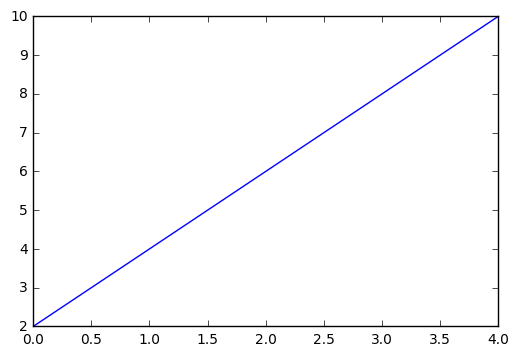

In [28]:
numbers = pd.Series(list(range(2,12, 2)))
numbers.plot()

### Histograms
Frequenfly it is useful to look at the distribution of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

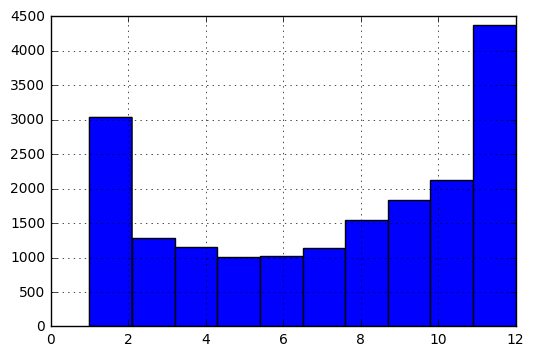

In [31]:
complaints['created_hour'].hist()

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an estimate of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the plot method with kind='kde', where kde stands for kernel density estimate.

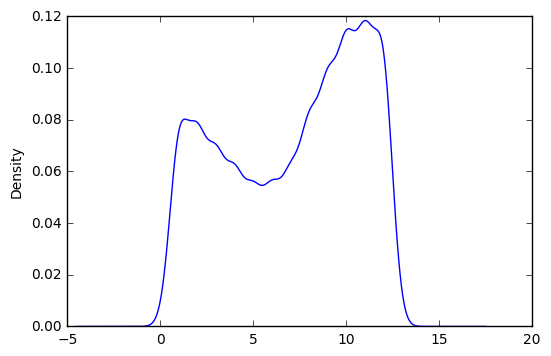

In [41]:
complaints['created_hour'].plot(kind='kde')

As we have geo data of complaints represented as a pair of latitude and longitude, we can easily plot the complaints location.

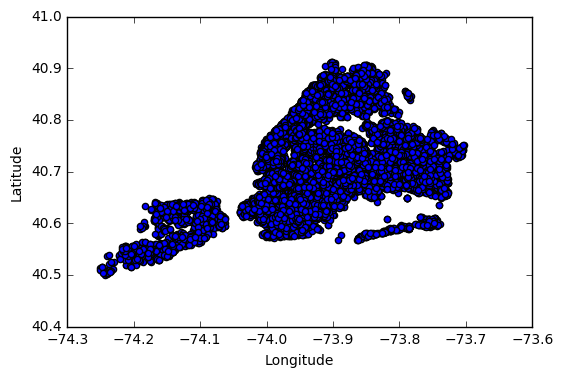

In [26]:
complaints.plot(kind='scatter', x='Longitude', y='Latitude')

## Exersices

Read the file nyc_complaints_data_exercises.csv to DataFrame and answer the following questions

Print the shape of Dataframe

Print first 5 rows of DataFrame

How can we find the earliest created date in DataFrame?

How can we find the latest created date in DataFrame?

How can we print just the column containing street names?

How can we get a list of boroughs in the DataFrame, without duplicates?

What is the largest NYC Agency responsible for complaints?

How can we compute number of complaints per hour?

How can we compute a Boolean array indicating whether the Agency is 'New York City Police Department'?

How can we create a new DataFrame containing only the 'New York City Police Department' records? Print 5 last rows of this new DataFrame

How can we use row and column indexing to set the status to closed in the second row of DataFrame?

How can we print the DataFrame, sorted by Status and by Complaint type?

How can we find the boroughs where the most complaints are about illegal parking at 9am?

This solution uses an & operator to set two conditions that must both be met: